In [1]:
from arcgis.gis import GIS
from arcgis import features
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from arcgis.geometry import lengths, areas_and_lengths, project
from arcgis.geometry import Point, Polyline, Polygon, Geometry
gis = GIS('home')

/opt/conda/lib/python3.7/site-packages/arcgis/gis/__init__.py:430: UserWarning: You are logged on as BRCAU5@ulaval.ca with an administrator role, proceed with caution.
  self.users.me.username)


<Item title:"BD_Inventaires_Secteur_gdb" type:Feature Layer Collection owner:BRCAU5@ulaval.ca>
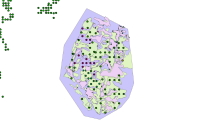

In [2]:
item = gis.content.get("73ea6cae5b7a46dcbd670e8ce031c4a5")
item

In [3]:
secteurGlobal = item.layers[11]
myQuery = secteurGlobal.query()
myPolygon = Polygon(myQuery.features[0].geometry)
myPolygon.area

/opt/conda/lib/python3.7/site-packages/arcpy/geoprocessing/_base.py:482: RuntimeWarning: No spatial reference detected, defaulting to unknown coordinate system.
  return self._gp.FromEsriJson(json)


8653671.48155431

In [4]:
myDictArea = {}
for lyr in item.layers:
    if(lyr.properties.name.endswith('_Bloc') ):
        area = 0
        for feature in lyr.query().features:
            area += Polygon(feature.geometry).area*100/myPolygon.area
        myDictArea[lyr.properties.name[:-5]] = area
myDictArea

{'IMLNU': 27.852572962515783,
 'Inter': 35.428225046789635,
 'QualRebois': 31.680669843120167,
 'Recolte': 49.347103209692186,
 'Regen': 10.183075009809054,
 'SuiviPlant': 24.166340855300746}

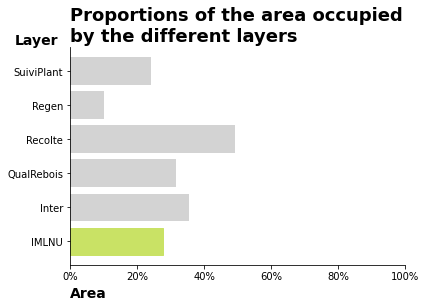

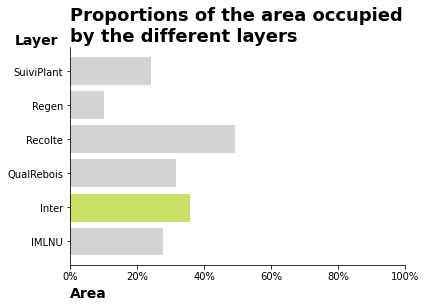

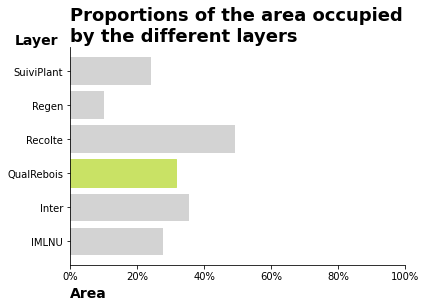

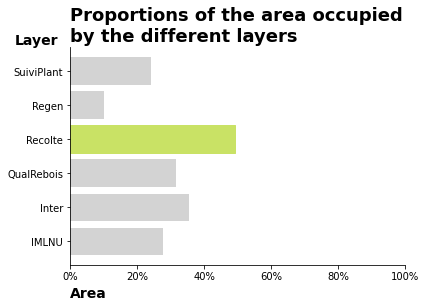

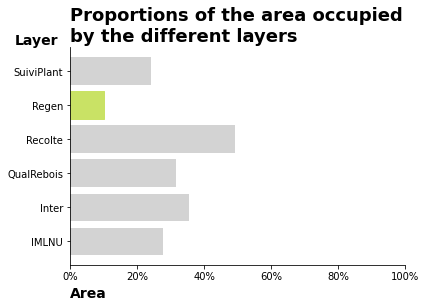

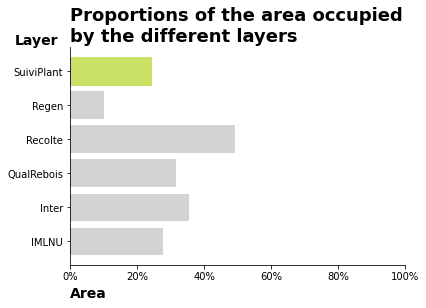

In [11]:
for i in range(len(myDictArea)):
    barlist = plt.barh(list(myDictArea.keys()), myDictArea.values(), color='lightgray')
    barlist[i].set_color('#C9E265')
    plt.savefig('/arcgis/directories/data/' + str(i) + '_area.png', bbox_inches='tight', pad_inches=1)
    plt.axis(xmax=100)
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_title('Proportions of the area occupied \nby the different layers', position=(0., 1), horizontalalignment='left',
                 fontsize=18, fontweight='bold')
    ax.set_xlabel('Area', position=(0, 1), horizontalalignment='left', labelpad=5, fontsize=14, fontweight='heavy')
    ax.set_ylabel('Layer', fontsize=14, rotation='horizontal', fontweight='heavy')
    ax.yaxis.set_label_coords(-0.10,1.0)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.show()

In [6]:
myDictYear = {}
for lyr in item.layers:
    if(lyr.properties.name != 'Secteur' and '_PS' not in lyr.properties.name):
        myTempList = []
        for feature in lyr.query().features:
            annee = feature.attributes['annee']
            if annee not in myTempList:
                myTempList.append(annee)
        myDictYear[lyr.properties.name[:-5]] = myTempList
myDictYear

{'IMLNU': [2018, 2017],
 'Inter': [2016, 2015],
 'QualRebois': [2019, 1995, 2003, 2005],
 'Recolte': [1981, 1982, 1987, 2002, 1995, 2001, 1993, 1997, 2016, 2017],
 'Regen': [2018, 2015],
 'SuiviPlant': [2018, 2011, 2012, 2008]}

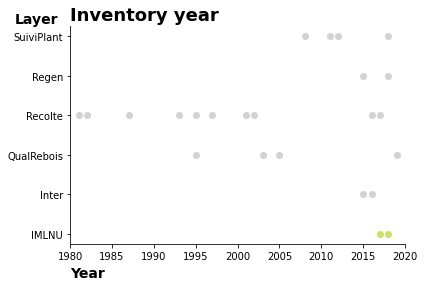

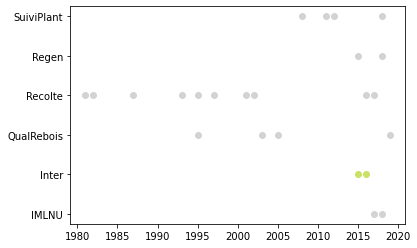

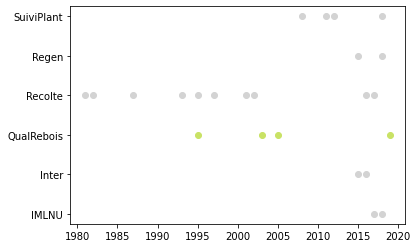

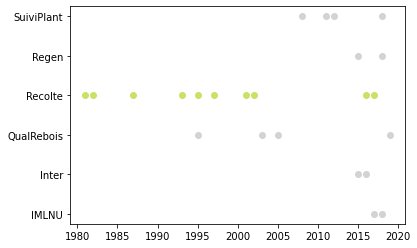

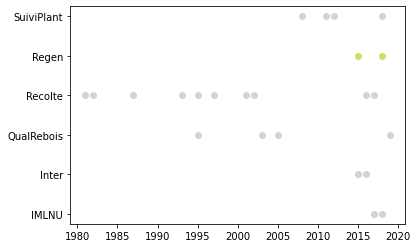

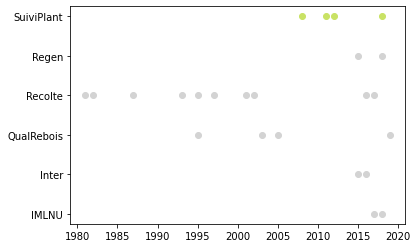

In [7]:
plt.axis(xmax=2020)
plt.axis(xmin=1980)
ax = plt.gca()
ax.set_title('Inventory year', position=(0., 1), horizontalalignment='left',
                 fontsize=18, fontweight='bold')
ax.set_xlabel('Year', position=(0, 1), horizontalalignment='left', labelpad=5, fontsize=14, fontweight='heavy')
ax.set_ylabel('Layer', fontsize=14, rotation='horizontal', fontweight='heavy')
ax.yaxis.set_label_coords(-0.1,1.0)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False) 
for layer in myDictYear.keys():
    for key,value in myDictYear.items():
        myList = []
        for element in value:
            myList.append(key)
        if layer == key:
            plt.scatter(value, myList, color='#C9E265')
        else:
            plt.scatter(value, myList, color='lightgray')
        
    plt.savefig('/arcgis/directories/data/' + str(layer) + '_year.png', bbox_inches='tight', pad_inches=1)
    plt.show()